## Jenny Mobile Distributor

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
df=pd.read_csv("Mobile phone dataset.csv")

### Checking the Dataset

In [3]:
df.head()

Brand              Model Storage    RAM Screen_Size              Camera  \
0    Apple      iPhone 13 Pro  128 GB   6 GB         6.1        12 + 12 + 12   
1  Samsung   Galaxy S21 Ultra  256 GB  12 GB         6.8  108 + 10 + 10 + 12   
2  OnePlus              9 Pro  128 GB   8 GB         6.7     48 + 50 + 8 + 2   
3   Xiaomi  Redmi Note 10 Pro  128 GB   6 GB        6.67      64 + 8 + 5 + 2   
4   Google            Pixel 6  128 GB   8 GB         6.4           50 + 12.2   

   Battery_Capacity Price  Label  
0              3095   999      1  
1              5000  1199      1  
2              4500   899      1  
3              5020   279      0  
4              4614   799      1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Brand             407 non-null    object
 1   Model             407 non-null    object
 2   Storage           407 non-null    object
 3   RAM               407 non-null    object
 4   Screen_Size       407 non-null    object
 5   Camera            407 non-null    object
 6   Battery_Capacity  407 non-null    int64 
 7   Price             407 non-null    object
 8   Label             407 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 28.7+ KB


In [5]:
df.isnull().sum()

Brand               0
Model               0
Storage             0
RAM                 0
Screen_Size         0
Camera              0
Battery_Capacity    0
Price               0
Label               0
dtype: int64

In [6]:
df.shape

(407, 9)

In [7]:
df.describe(include=["object", "bool"])

Brand        Model Storage  RAM Screen_Size            Camera  Price
count       407          407     407  407         407               407    407
unique       16          239      13   20          41               143     89
top     Samsung  Poco X3 Pro   128GB  4GB         6.5  13MP + 2MP + 2MP  $149 
freq         79            6     125   68         108                29     18

In [8]:
df.describe()

Battery_Capacity       Label
count        407.000000  407.000000
mean        4676.476658    0.692875
std          797.193713    0.461870
min         1821.000000    0.000000
25%         4300.000000    0.000000
50%         5000.000000    1.000000
75%         5000.000000    1.000000
max         7000.000000    1.000000

## Cleaning Dataset

In [9]:
df.columns

Index(['Brand', 'Model', 'Storage', 'RAM', 'Screen_Size', 'Camera',
       'Battery_Capacity', 'Price', 'Label'],
      dtype='object')

In [10]:
df.Price.unique()

array(['999', '1199', '899', '279', '799', '249', '699', '329', '449',
       '199', '299', '379', '179', '729', '599', '139', '189', '399',
       '259', '159', '229', '499', '129', '529', '369', '1099', '169',
       '99', '459', '239', '1299', '429', '659', '269', '359', '$799 ',
       '$399 ', '$699 ', '$329 ', '$999 ', '$549 ', '$1,299 ', '$899 ',
       '$449 ', '$319 ', '$269 ', '$349 ', '$279 ', '$249 ', '$299 ',
       '$969 ', '$1,199 ', '$149 ', '$139 ', '$99 ', '$199 ', '$169 ',
       '$499 ', '$179 ', '$219 ', '$229 ', '$239 ', '$109 ', '$189 ',
       '$389 ', '$309 ', '$369 ', '$129 ', '$849 ', '$469 ', '$209 ',
       '$119 ', '$339 ', '$429 ', '$159 ', '$379 ', '$289 ', '130', '749',
       '149', '969', '649', '349', '419', '1399', '1999', '119', '319',
       '1049'], dtype=object)

In [11]:
df["Price"]= df["Price"].str.replace("$","")
df["Price"]= df["Price"].str.replace(",","")
df["Price"]= df["Price"].astype("float64")

In [12]:
df.Price.info();

<class 'pandas.core.series.Series'>
RangeIndex: 407 entries, 0 to 406
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
407 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [13]:
df.Storage.unique()

array(['128 GB', '256 GB', '64 GB', '32 GB', '128GB', '256GB', '64GB',
       '32GB', '256', '64', '128', '512', '32'], dtype=object)

In [14]:
df["Storage"]= df["Storage"].str.replace("GB","")
df["Storage"]= df["Storage"].str.replace(" ","")
df["Storage"]= df["Storage"].astype("float64")

In [15]:
df.Storage.unique()

array([128., 256.,  64.,  32., 512.])

In [16]:
df.Storage.info()

<class 'pandas.core.series.Series'>
RangeIndex: 407 entries, 0 to 406
Series name: Storage
Non-Null Count  Dtype  
--------------  -----  
407 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [17]:
df.RAM.unique()

array(['6 GB', '12 GB', '8 GB', '4 GB', '3 GB', '2 GB', '4GB', '8GB',
       '6GB', '12GB', '3GB', '2GB', '5GB', '12', '3', '6', '8', '4', '16',
       '2'], dtype=object)

In [18]:
df["RAM"]= df["RAM"].str.replace("GB","")
df["RAM"]= df["RAM"].str.replace(" ","")
df["RAM"]= df["RAM"].astype("float64")

In [19]:
df.RAM.unique()

array([ 6., 12.,  8.,  4.,  3.,  2.,  5., 16.])

In [20]:
df.RAM.info()

<class 'pandas.core.series.Series'>
RangeIndex: 407 entries, 0 to 406
Series name: RAM
Non-Null Count  Dtype  
--------------  -----  
407 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [21]:
df.columns

Index(['Brand', 'Model', 'Storage', 'RAM', 'Screen_Size', 'Camera',
       'Battery_Capacity', 'Price', 'Label'],
      dtype='object')

In [22]:
df.Screen_Size.unique()

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.55', '6.78', '6.43', '6.5',
       '6.62', '5.4', '6.2', '6.51', '6.6', '4.7', '6.58', '6.52', '6.44',
       '6.53', '6.56', '6.8 + 3.9', '4.5', '6.39', '5.9', '5.5', '6.81',
       '5.99', '6.82', '6.3', '6.22', '6', '6.35', '6.9', '6.76', '6.49',
       '6.72', '5.7', '6.47', '7.6 (unfolded)', '6.15', '6.57'],
      dtype=object)

In [23]:
df.loc[df["Screen_Size"]=="6.8 + 3.9","Screen_Size"] = "6.5"
df.loc[df["Screen_Size"]=="7.6 (unfolded)","Screen_Size"] = "6.5"
df["Screen_Size"]= df["Screen_Size"].astype("float64")

In [24]:
df.Screen_Size.unique()

array([6.1 , 6.8 , 6.7 , 6.67, 6.4 , 6.55, 6.78, 6.43, 6.5 , 6.62, 5.4 ,
       6.2 , 6.51, 6.6 , 4.7 , 6.58, 6.52, 6.44, 6.53, 6.56, 4.5 , 6.39,
       5.9 , 5.5 , 6.81, 5.99, 6.82, 6.3 , 6.22, 6.  , 6.35, 6.9 , 6.76,
       6.49, 6.72, 5.7 , 6.47, 6.15, 6.57])

In [25]:
df.Screen_Size.info()

<class 'pandas.core.series.Series'>
RangeIndex: 407 entries, 0 to 406
Series name: Screen_Size
Non-Null Count  Dtype  
--------------  -----  
407 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [26]:
df.Camera.unique()

array(['12 + 12 + 12', '108 + 10 + 10 + 12', '48 + 50 + 8 + 2',
       '64 + 8 + 5 + 2', '50 + 12.2', '12 + 12', '48 + 8 + 2 + 2',
       '50 + 13 + 16 + 2', '50 + 48 + 12 + 8', '64 + 8 + 2',
       '64 + 12 + 5 + 5', '50 + 50 + 13 + 3', '64 + 8 + 5',
       '64 + 12 + 12', '50 + 2 + 2', '48 + 2 + 2', '50 + 8 + 2 + 2',
       '48 + 5', '48 + 50 + 2', '108 + 8 + 5 + 2', '13 + 2 + 2', '13 + 2',
       '12', '48 + 5 + 2', '50 + 8 + 2', '64 + 8 + 2 + 2', '48 + 8 + 5',
       '64 + 8', '48 + 5 + 2 + 2', '50 + 2', '64 + 12 + 8 + 5', '64 + 2',
       '48 + 13 + 13', '12MP + 12MP', '64MP + 12MP + 12MP',
       '50MP + 8MP + 2MP', '50MP + 12MP', '48MP + 8MP + 2MP + 2MP',
       '64MP + 8MP + 2MP', '50MP + 48MP + 12MP + 8MP',
       '50MP + 16MP + 13MP + 2MP', '108MP + 16MP + 8MP', '48MP + 13MP',
       '12MP + 12MP + 12MP', '64MP + 13MP + 12MP', '64MP + 12MP + 8MP',
       '13MP + 5MP', '64MP + 12MP + 8MP + 5MP', '108MP + 8MP + 5MP + 2MP',
       '48MP + 50MP + 2MP', '50MP + 2MP + 2MP', '108MP 

In [27]:
df["Camera"]= df["Camera"].str.replace("MP","")
df["Camera"]= df["Camera"].str.replace("D","")

In [28]:
df["Camera"]= df["Camera"].str.split("+")

In [29]:
listx=[]
for i in df.index:
    listx.append(df["Camera"][i][0])

In [30]:
df["Camera"]= listx

In [31]:
df["Camera"]= df["Camera"].astype("float64")

In [32]:
df.Camera.info()

<class 'pandas.core.series.Series'>
RangeIndex: 407 entries, 0 to 406
Series name: Camera
Non-Null Count  Dtype  
--------------  -----  
407 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [33]:
df.Camera.unique()

array([ 12. , 108. ,  48. ,  64. ,  50. ,  13. ,   8. ,  25. ,  12.2,
        40. ,  16. ])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             407 non-null    object 
 1   Model             407 non-null    object 
 2   Storage           407 non-null    float64
 3   RAM               407 non-null    float64
 4   Screen_Size       407 non-null    float64
 5   Camera            407 non-null    float64
 6   Battery_Capacity  407 non-null    int64  
 7   Price             407 non-null    float64
 8   Label             407 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 28.7+ KB


In [35]:
df.head()

Brand              Model  Storage   RAM  Screen_Size  Camera  \
0    Apple      iPhone 13 Pro    128.0   6.0         6.10    12.0   
1  Samsung   Galaxy S21 Ultra    256.0  12.0         6.80   108.0   
2  OnePlus              9 Pro    128.0   8.0         6.70    48.0   
3   Xiaomi  Redmi Note 10 Pro    128.0   6.0         6.67    64.0   
4   Google            Pixel 6    128.0   8.0         6.40    50.0   

   Battery_Capacity   Price  Label  
0              3095   999.0      1  
1              5000  1199.0      1  
2              4500   899.0      1  
3              5020   279.0      0  
4              4614   799.0      1

## Exploratory Data Analysis

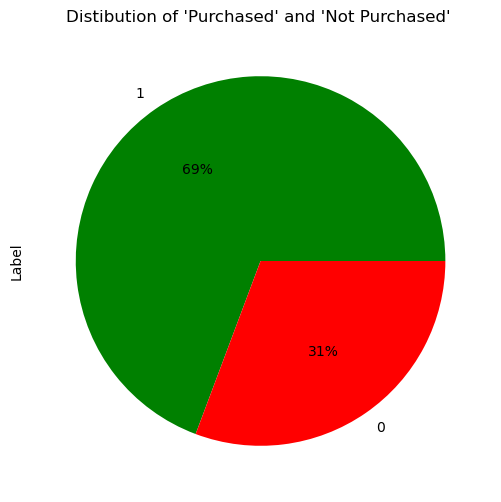

In [36]:
df["Label"].value_counts().plot(kind="pie", autopct="%1.0f%%", figsize=(6,6), colors=["green","red"], title= "Distibution of 'Purchased' and 'Not Purchased' ");

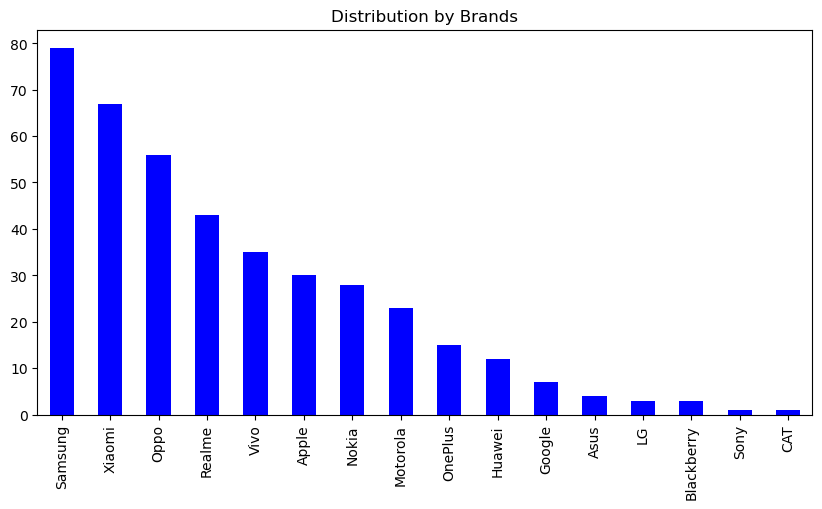

In [37]:
df.Brand.value_counts().plot(kind="bar", figsize=(10,5), title= "Distribution by Brands", color= "blue");


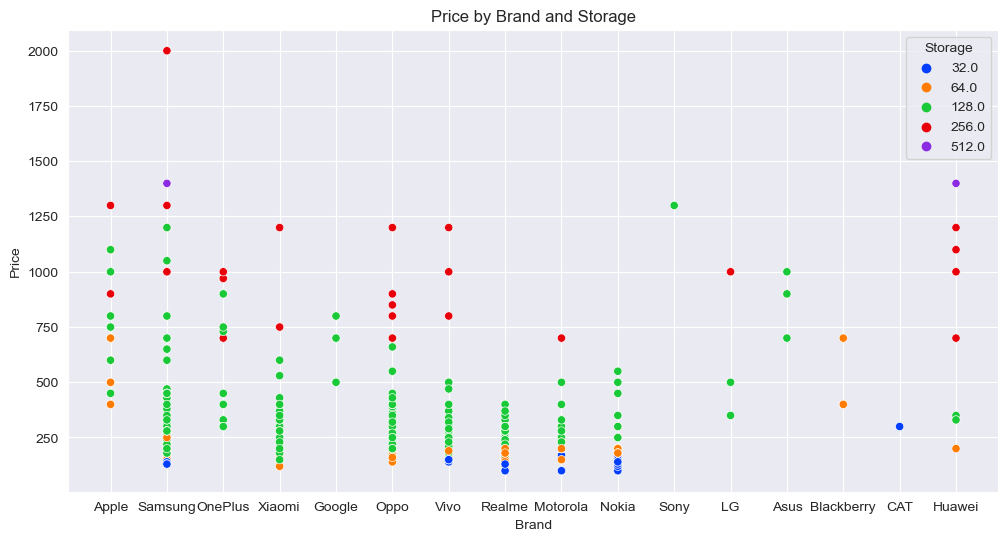

In [38]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.scatterplot(data=df, x="Brand", y="Price", hue="Storage", palette="bright")
plt.title("Price by Brand and Storage");

Text(0.5, 1.0, 'Prices of Brand with Boxplot to visualize Outliers')

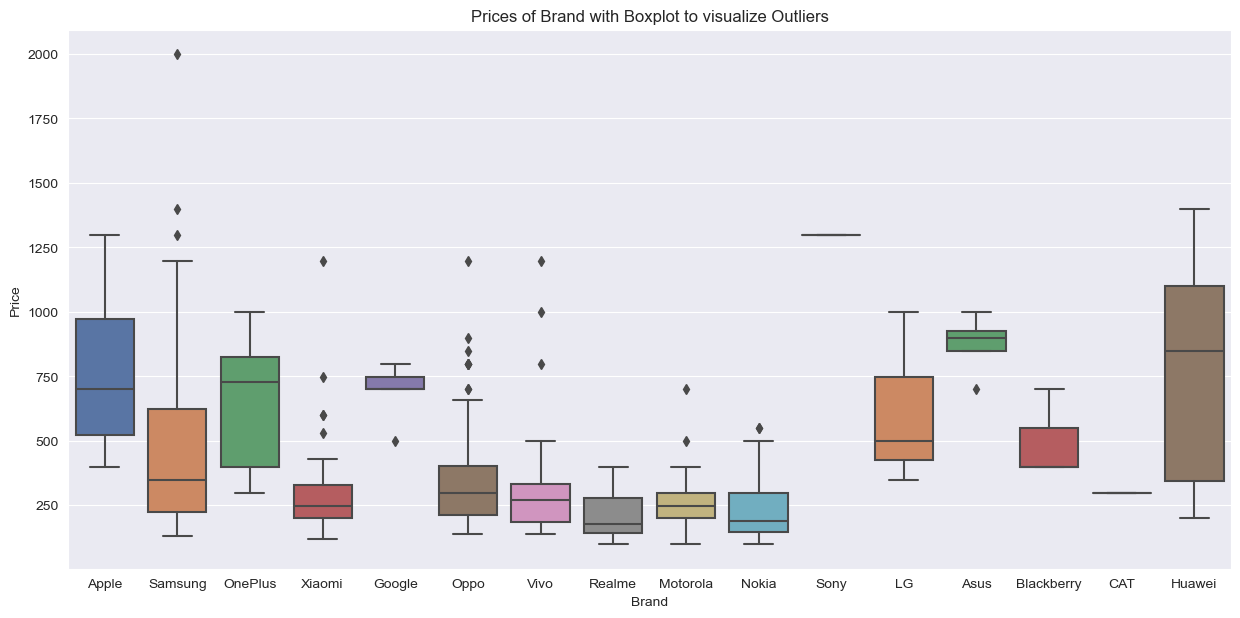

In [39]:
#checking for outliers
plt.figure(figsize=(15,7))
sns.boxplot(x="Brand", y="Price", data=df, palette="deep")
plt.title("Prices of Brand with Boxplot to visualize Outliers")

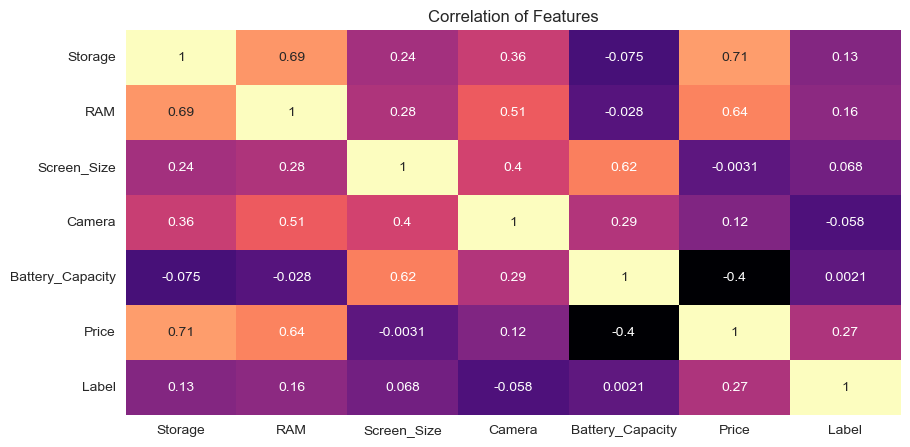

In [40]:
plt.figure(figsize=(10,5))
corr_matrix= df.corr()
sns.heatmap(corr_matrix, cmap= "magma", annot=True, cbar=False)
plt.title("Correlation of Features");

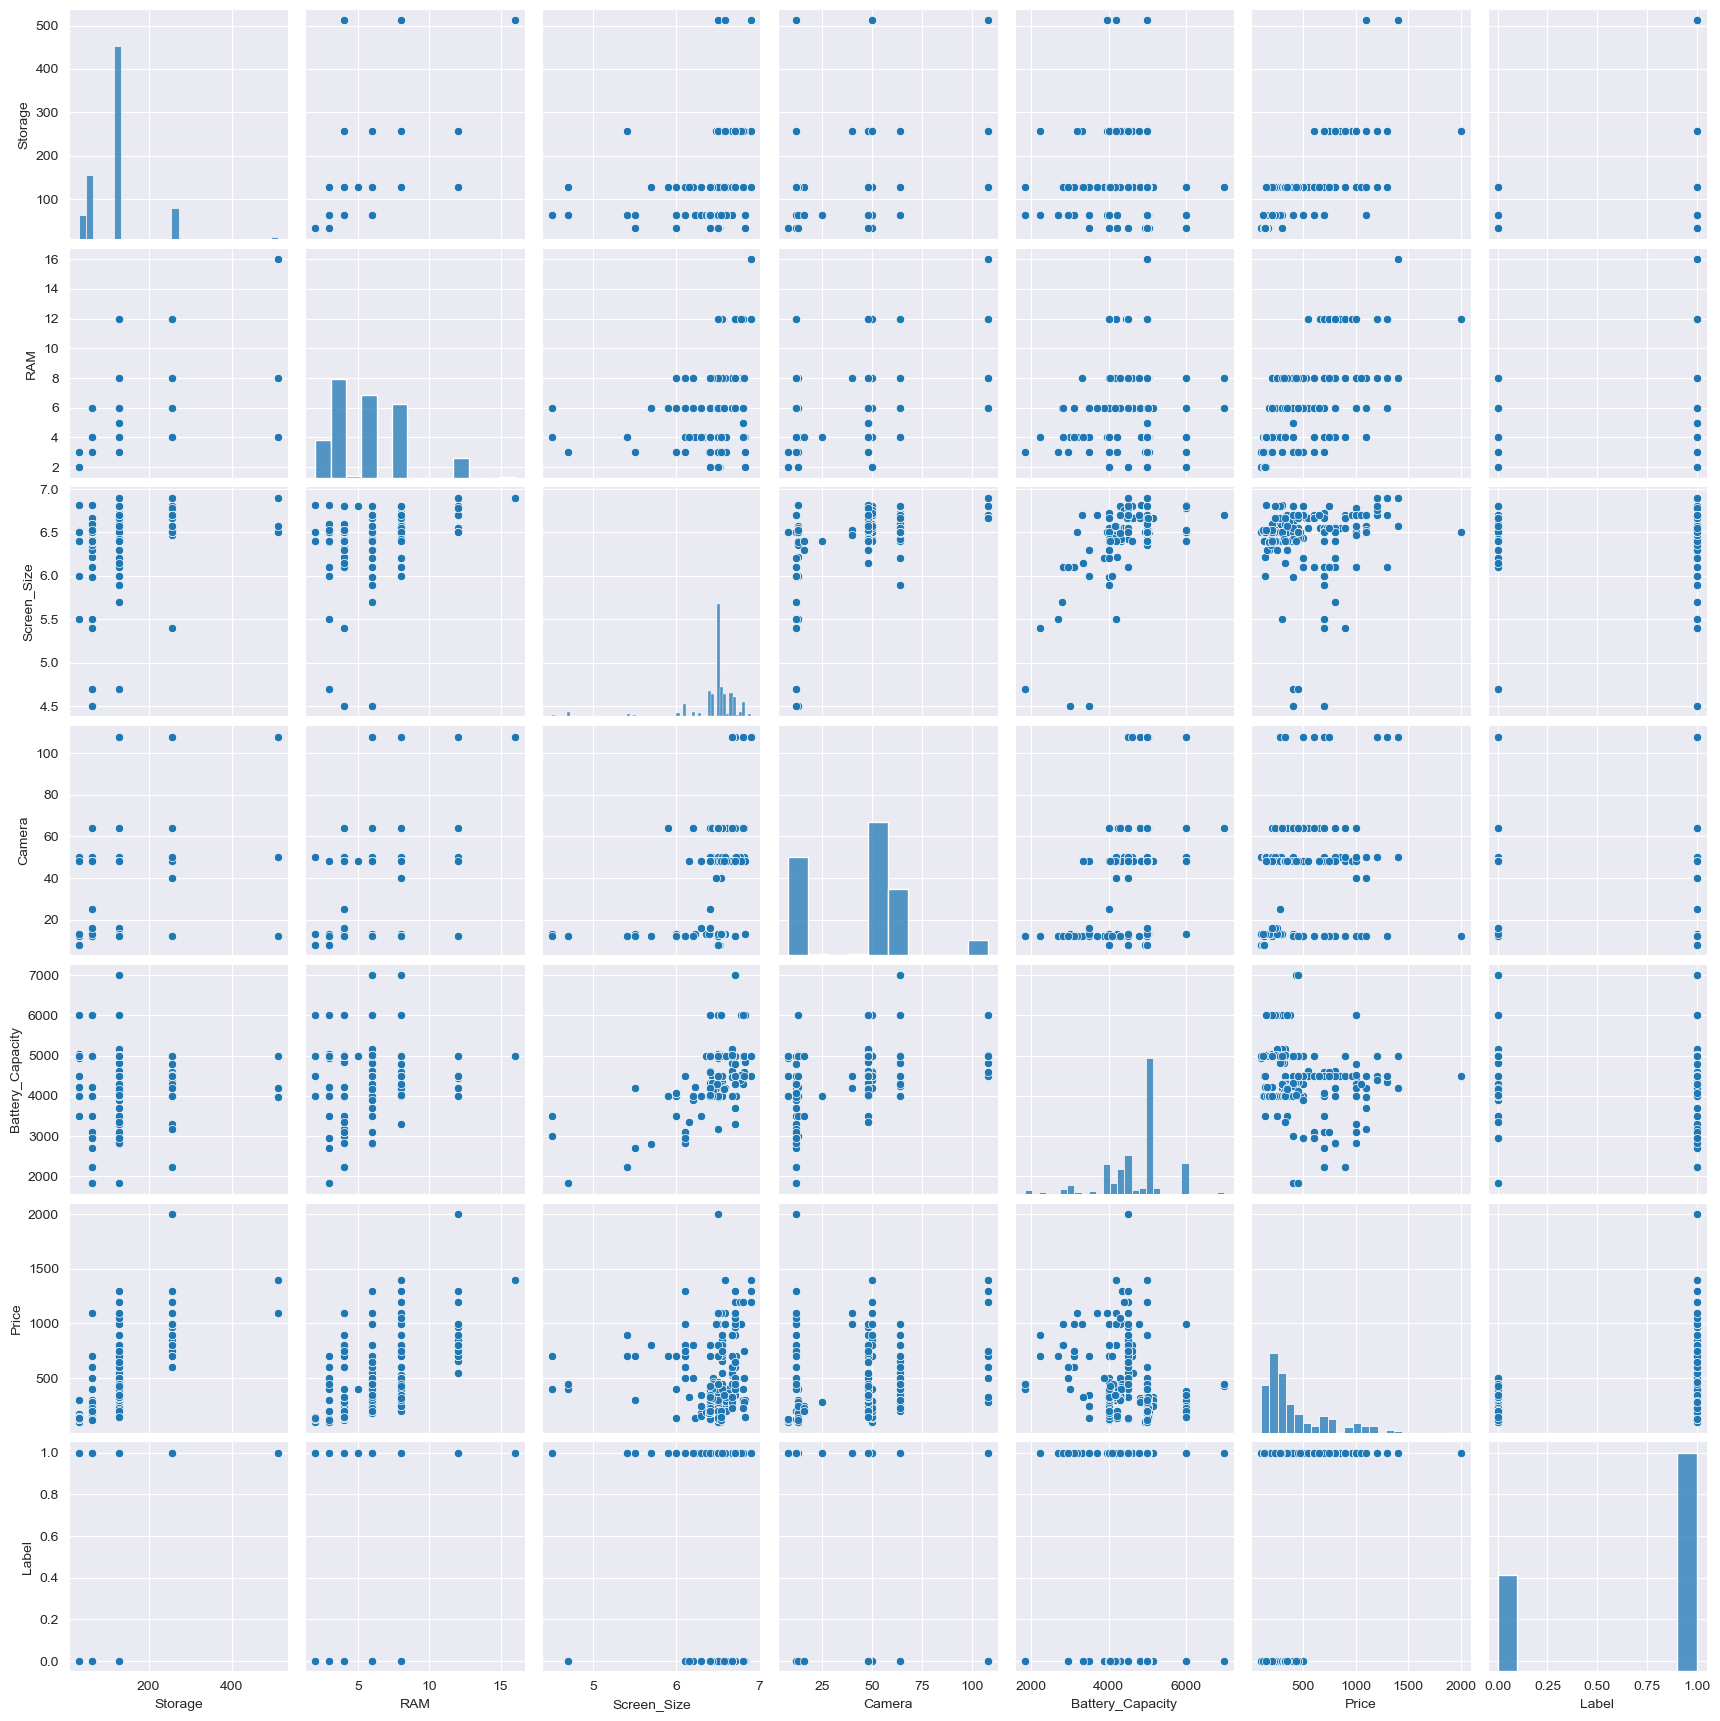

In [41]:
pairplt= sns.pairplot(df)

## Machine Learning Models

- Scaling the Dataset for Use

In [42]:
data= pd.get_dummies(df,columns=["Brand"])
data

Model  Storage   RAM  Screen_Size  Camera  Battery_Capacity  \
0        iPhone 13 Pro    128.0   6.0         6.10    12.0              3095   
1     Galaxy S21 Ultra    256.0  12.0         6.80   108.0              5000   
2                9 Pro    128.0   8.0         6.70    48.0              4500   
3    Redmi Note 10 Pro    128.0   6.0         6.67    64.0              5020   
4              Pixel 6    128.0   8.0         6.40    50.0              4614   
..                 ...      ...   ...          ...     ...               ...   
402   Galaxy Note20 5G    128.0   8.0         6.70    12.0              4300   
403      Mi 10 Lite 5G    128.0   6.0         6.57    48.0              4160   
404  iPhone 12 Pro Max    128.0   6.0         6.70    12.0              3687   
405              Reno3    128.0   8.0         6.40    48.0              4025   
406    Galaxy S10 Lite    128.0   6.0         6.70    48.0              4500   

      Price  Label  Brand_Apple  Brand_Asus  ...  Brand_LG  Brand_Motorola  \
0     999.0      1            1           0  ...         0               0   
1    1199.0      1            0           0  ...         0               0   
2     899.0      1            0           0  ...         0               0   
3     279.0      0            0           0  ...         0               0   
4     799.0      1            0           0  ...         0               0   
..      ...    ...          ...         ...  ...       ...             ...   
402  1049.0      1            0           0  ...         0               0   
403   349.0      0            0           0  ...         0               0   
404  1099.0      1            1           0  ...         0               0   
405   429.0      0            0           0  ...         0               0   
406   649.0      1            0           0  ...         0               0   

     Brand_Nokia  Brand_OnePlus  Brand_Oppo  Brand_Realme  Brand_Samsung  \
0              0              0           0             0              0   
1              0              0           0             0              1   
2              0              1           0             0              0   
3              0              0           0             0              0   
4              0              0           0             0              0   
..           ...            ...         ...           ...            ...   
402            0              0           0             0              1   
403            0              0           0             0              0   
404            0              0           0             0              0   
405            0              0           1             0              0   
406            0              0           0             0              1   

     Brand_Sony  Brand_Vivo  Brand_Xiaomi  
0             0           0             0  
1             0           0             0  
2             0           0             0  
3             0           0             1  
4             0           0             0  
..          ...         ...           ...  
402           0           0             0  
403           0           0             1  
404           0           0             0  
405           0           0             0  
406           0           0             0  

[407 rows x 24 columns]

In [43]:
data.columns

Index(['Model', 'Storage', 'RAM', 'Screen_Size', 'Camera', 'Battery_Capacity',
       'Price', 'Label', 'Brand_Apple', 'Brand_Asus', 'Brand_Blackberry',
       'Brand_CAT', 'Brand_Google', 'Brand_Huawei', 'Brand_LG',
       'Brand_Motorola', 'Brand_Nokia', 'Brand_OnePlus', 'Brand_Oppo',
       'Brand_Realme', 'Brand_Samsung', 'Brand_Sony', 'Brand_Vivo',
       'Brand_Xiaomi'],
      dtype='object')

In [44]:
data= pd.get_dummies(df,columns=["Brand"],drop_first=True)
data

Model  Storage   RAM  Screen_Size  Camera  Battery_Capacity  \
0        iPhone 13 Pro    128.0   6.0         6.10    12.0              3095   
1     Galaxy S21 Ultra    256.0  12.0         6.80   108.0              5000   
2                9 Pro    128.0   8.0         6.70    48.0              4500   
3    Redmi Note 10 Pro    128.0   6.0         6.67    64.0              5020   
4              Pixel 6    128.0   8.0         6.40    50.0              4614   
..                 ...      ...   ...          ...     ...               ...   
402   Galaxy Note20 5G    128.0   8.0         6.70    12.0              4300   
403      Mi 10 Lite 5G    128.0   6.0         6.57    48.0              4160   
404  iPhone 12 Pro Max    128.0   6.0         6.70    12.0              3687   
405              Reno3    128.0   8.0         6.40    48.0              4025   
406    Galaxy S10 Lite    128.0   6.0         6.70    48.0              4500   

      Price  Label  Brand_Asus  Brand_Blackberry  ...  Brand_LG  \
0     999.0      1           0                 0  ...         0   
1    1199.0      1           0                 0  ...         0   
2     899.0      1           0                 0  ...         0   
3     279.0      0           0                 0  ...         0   
4     799.0      1           0                 0  ...         0   
..      ...    ...         ...               ...  ...       ...   
402  1049.0      1           0                 0  ...         0   
403   349.0      0           0                 0  ...         0   
404  1099.0      1           0                 0  ...         0   
405   429.0      0           0                 0  ...         0   
406   649.0      1           0                 0  ...         0   

     Brand_Motorola  Brand_Nokia  Brand_OnePlus  Brand_Oppo  Brand_Realme  \
0                 0            0              0           0             0   
1                 0            0              0           0             0   
2                 0            0              1           0             0   
3                 0            0              0           0             0   
4                 0            0              0           0             0   
..              ...          ...            ...         ...           ...   
402               0            0              0           0             0   
403               0            0              0           0             0   
404               0            0              0           0             0   
405               0            0              0           1             0   
406               0            0              0           0             0   

     Brand_Samsung  Brand_Sony  Brand_Vivo  Brand_Xiaomi  
0                0           0           0             0  
1                1           0           0             0  
2                0           0           0             0  
3                0           0           0             1  
4                0           0           0             0  
..             ...         ...         ...           ...  
402              1           0           0             0  
403              0           0           0             1  
404              0           0           0             0  
405              0           0           0             0  
406              1           0           0             0  

[407 rows x 23 columns]

In [45]:
x= data.drop(["Price", "Label", "Model"],axis=1)
y= data["Price"]

In [46]:
x

Storage   RAM  Screen_Size  Camera  Battery_Capacity  Brand_Asus  \
0      128.0   6.0         6.10    12.0              3095           0   
1      256.0  12.0         6.80   108.0              5000           0   
2      128.0   8.0         6.70    48.0              4500           0   
3      128.0   6.0         6.67    64.0              5020           0   
4      128.0   8.0         6.40    50.0              4614           0   
..       ...   ...          ...     ...               ...         ...   
402    128.0   8.0         6.70    12.0              4300           0   
403    128.0   6.0         6.57    48.0              4160           0   
404    128.0   6.0         6.70    12.0              3687           0   
405    128.0   8.0         6.40    48.0              4025           0   
406    128.0   6.0         6.70    48.0              4500           0   

     Brand_Blackberry  Brand_CAT  Brand_Google  Brand_Huawei  Brand_LG  \
0                   0          0             0             0         0   
1                   0          0             0             0         0   
2                   0          0             0             0         0   
3                   0          0             0             0         0   
4                   0          0             1             0         0   
..                ...        ...           ...           ...       ...   
402                 0          0             0             0         0   
403                 0          0             0             0         0   
404                 0          0             0             0         0   
405                 0          0             0             0         0   
406                 0          0             0             0         0   

     Brand_Motorola  Brand_Nokia  Brand_OnePlus  Brand_Oppo  Brand_Realme  \
0                 0            0              0           0             0   
1                 0            0              0           0             0   
2                 0            0              1           0             0   
3                 0            0              0           0             0   
4                 0            0              0           0             0   
..              ...          ...            ...         ...           ...   
402               0            0              0           0             0   
403               0            0              0           0             0   
404               0            0              0           0             0   
405               0            0              0           1             0   
406               0            0              0           0             0   

     Brand_Samsung  Brand_Sony  Brand_Vivo  Brand_Xiaomi  
0                0           0           0             0  
1                1           0           0             0  
2                0           0           0             0  
3                0           0           0             1  
4                0           0           0             0  
..             ...         ...         ...           ...  
402              1           0           0             0  
403              0           0           0             1  
404              0           0           0             0  
405              0           0           0             0  
406              1           0           0             0  

[407 rows x 20 columns]

In [47]:
y

0       999.0
1      1199.0
2       899.0
3       279.0
4       799.0
        ...  
402    1049.0
403     349.0
404    1099.0
405     429.0
406     649.0
Name: Price, Length: 407, dtype: float64

In [48]:
# scaling dataset

scaler= StandardScaler()
scaled_x= scaler.fit_transform(x)

In [49]:
scaled_x

array([[ 0.07634194,  0.06676114, -1.16844872, ..., -0.04962917,
        -0.30673445, -0.44391308],
       [ 2.04911449,  2.53692344,  1.05527232, ..., -0.04962917,
        -0.30673445, -0.44391308],
       [ 0.07634194,  0.89014858,  0.73759789, ..., -0.04962917,
        -0.30673445, -0.44391308],
       ...,
       [ 0.07634194,  0.06676114,  0.73759789, ..., -0.04962917,
        -0.30673445, -0.44391308],
       [ 0.07634194,  0.89014858, -0.21542542, ..., -0.04962917,
        -0.30673445, -0.44391308],
       [ 0.07634194,  0.06676114,  0.73759789, ..., -0.04962917,
        -0.30673445, -0.44391308]])

## Regression (Continous Numbers)

### Linear Regression

In [50]:
# split dataset into training and test set X= Question y= Answer
X_train, X_test, y_train, y_test= train_test_split(scaled_x, y, test_size=0.1, random_state=343)

In [51]:
#instantiating and fitting model on trainign data set
price_model= LinearRegression()
price_model.fit(X_train,y_train)

LinearRegression()

In [52]:
pred= price_model.predict(X_test)

In [53]:
mse= mean_squared_error(y_test,pred)
print(f"MSE SCORE: {mse}")

r2= r2_score(y_test,pred)
print(f"R2 SCORE: {r2}")

rmse= np.sqrt(mse)
print(f"RMSE SCORE: {rmse}")

MSE SCORE: 8069.384524387137
R2 SCORE: 0.9195627309824653
RMSE SCORE: 89.82975300192658


In [54]:
df_result= pd.DataFrame({"Actual":y_test,"Predicted":pred})
df_result["loss/residual"]= df_result["Actual"] - df_result["Predicted"]
df_result

Actual    Predicted  loss/residual
200   219.0   320.519772    -101.519772
45    699.0   586.334053     112.665947
340   249.0   373.146784    -124.146784
3     279.0   336.632122     -57.632122
115   799.0   890.739650     -91.739650
285   129.0    43.922561      85.077439
80    699.0   704.867474      -5.867474
400   329.0   315.949129      13.050871
356   179.0   342.810153    -163.810153
351   999.0   936.247455      62.752545
166   129.0    88.861558      40.138442
199   119.0   155.036721     -36.036721
232   289.0   389.516206    -100.516206
265   159.0   173.467284     -14.467284
55    239.0   215.194594      23.805406
352   399.0   360.369643      38.630357
226   169.0   120.671673      48.328327
174   249.0   363.967516    -114.967516
338  1099.0  1052.764032      46.235968
167   449.0   483.226580     -34.226580
403   349.0   407.243340     -58.243340
335   799.0   928.087086    -129.087086
306   159.0   173.467284     -14.467284
144   149.0   214.847325     -65.847325
161   349.0   295.731964      53.268036
367  1399.0  1655.797611    -256.797611
156   179.0   109.212287      69.787713
105   149.0     9.584979     139.415021
309  1199.0   991.037270     207.962730
324   349.0   433.573608     -84.573608
275   149.0   195.023422     -46.023422
198   149.0   112.664771      36.335229
379   449.0   485.188426     -36.188426
394   199.0   228.969921     -29.969921
118   249.0   178.230977      70.769023
99    699.0   644.633987      54.366013
33    259.0   345.315882     -86.315882
339   279.0   342.810153     -63.810153
155   249.0   294.963685     -45.963685
11    449.0   471.428920     -22.428920
185   239.0   350.789229    -111.789229

In [55]:
feature_coefs = price_model.coef_
feature_names = x.columns

# Create a data frame of feature importance coefficients
feature_importance = pd.DataFrame({'feature': feature_names, 'coef': feature_coefs})

# Sort feature importance coefficients in descending order
feature_importance.sort_values(by='coef', ascending=False, inplace=True)
print(feature_importance)

             feature        coef
1                RAM  160.738822
0            Storage   95.745783
2        Screen_Size   70.167376
17        Brand_Sony   17.155358
6   Brand_Blackberry   -0.122880
7          Brand_CAT   -3.197366
5         Brand_Asus   -4.441436
8       Brand_Google  -28.759049
10          Brand_LG  -30.586232
9       Brand_Huawei  -49.305347
4   Battery_Capacity  -52.204715
3             Camera  -56.229614
13     Brand_OnePlus  -81.797073
11    Brand_Motorola  -89.897272
12       Brand_Nokia -104.923687
16     Brand_Samsung -126.241375
15      Brand_Realme -151.357345
18        Brand_Vivo -154.322372
19      Brand_Xiaomi -169.762770
14        Brand_Oppo -182.193594


### Decision Tree Regressor

In [56]:
decitree  = DecisionTreeRegressor()
decitree.fit(X_train,y_train)

DecisionTreeRegressor()

In [57]:
pred = decitree.predict(X_test)

In [58]:
mse= mean_squared_error(y_test,pred)
print(f"MSE SCORE: {mse}")

r2= r2_score(y_test,pred)
print(f"R2 SCORE: {r2}")

rmse= np.sqrt(mse)
print(f"RMSE SCORE: {rmse}")

MSE SCORE: 1332.972391598916
R2 SCORE: 0.9867126596171061
RMSE SCORE: 36.50989443423407


### Random Forest Regressor

In [59]:
forest_pred = RandomForestRegressor()
forest_pred.fit(X_train,y_train)

RandomForestRegressor()

In [60]:
pred = forest_pred.predict(X_test)

In [61]:
mse= mean_squared_error(y_test,pred)
print(f"MSE SCORE: {mse}")

r2= r2_score(y_test,pred)
print(f"R2 SCORE: {r2}")

rmse= np.sqrt(mse)
print(f"RMSE SCORE: {rmse}")

MSE SCORE: 1582.606552347454
R2 SCORE: 0.9842242554416188
RMSE SCORE: 39.781987787784736


## Classification (Yes / No)

### Decision Tree Classification

In [62]:
X = data.drop(["Price",'Label','Model'],axis=1)
y = data["Label"]

In [63]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Training the Decision Tree Classifier
classf = DecisionTreeClassifier()
classf.fit(X_train, y_train)

# Making predictions on the test set
pred = classf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print('Accuracy: %.2f' % accuracy)
print('Precision: %.2f' % precision)
print('recall: %.2f' % recall)
print('f1: %.2f' % f1)

Accuracy: 0.66
Precision: 0.81
recall: 0.70
f1: 0.75


##### Classification Report

In [64]:
#model evaluation
print("Random Forest Model accuracy:", accuracy_score(y_test,pred))
print("classification report: \n", classification_report(y_test,pred))

Random Forest Model accuracy: 0.6585365853658537
classification report: 
               precision    recall  f1-score   support

           0       0.40      0.55      0.46        22
           1       0.81      0.70      0.75        60

    accuracy                           0.66        82
   macro avg       0.60      0.62      0.61        82
weighted avg       0.70      0.66      0.67        82



##### Confusion Matrix

In [65]:
confusion_matrix = confusion_matrix(y_test, pred)
print(confusion_matrix)

[[12 10]
 [18 42]]


### Logistic Regression

In [66]:
logcla = LogisticRegression()

In [67]:
logcla.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logcla.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: %.2f' % accuracy)
print('Precision: %.2f' % precision)
print('recall: %.2f' % recall)
print('f1: %.2f' % f1)

Accuracy: 0.68
Precision: 0.72
recall: 0.93
f1: 0.81


### Random Forest

In [68]:
ranfoclass = RandomForestClassifier()

In [69]:
ranfoclass.fit(X_train, y_train)

# Making predictions on the test set
y_pred = ranfoclass.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: %.2f' % accuracy)
print('Precision: %.2f' % precision)
print('recall: %.2f' % recall)
print('f1: %.2f' % f1)

Accuracy: 0.72
Precision: 0.80
recall: 0.82
f1: 0.81


#### The above are the test accuracies of different algorithms.  Random Forest Regressor as the highest R2 Score while Random Forest Classifier has the highest accuracy with 70%
#####  Linear Regression
- MSE SCORE: 8069.384524387137
- R2 SCORE: 0.9195627309824653
- RMSE SCORE: 89.82975300192658 

##### Decision Tree Regressor
- MSE SCORE: 3177.670901084011
- R2 SCORE: 0.9683243290306457
- RMSE SCORE: 56.37083378028048

##### Random Forest Regressor
- MSE SCORE: 1654.9274847960742
- R2 SCORE: 0.9835033456521067
- RMSE SCORE: 40.68079995275504

##### Decision Tree Classifier
- Accuracy: 0.67
- Precision: 0.81
- recall: 0.72
- f1: 0.76

##### Logistic Regression
- Accuracy: 0.68
- Precision: 0.72
- recall: 0.93
- f1: 0.81

##### Random Forest Classifier
- Accuracy: 0.70
- Precision: 0.80
- recall: 0.78
- f1: 0.79